# Bernstein-Vazirani Algorithm

In [ ]:
from qiskit import*
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '101010101'

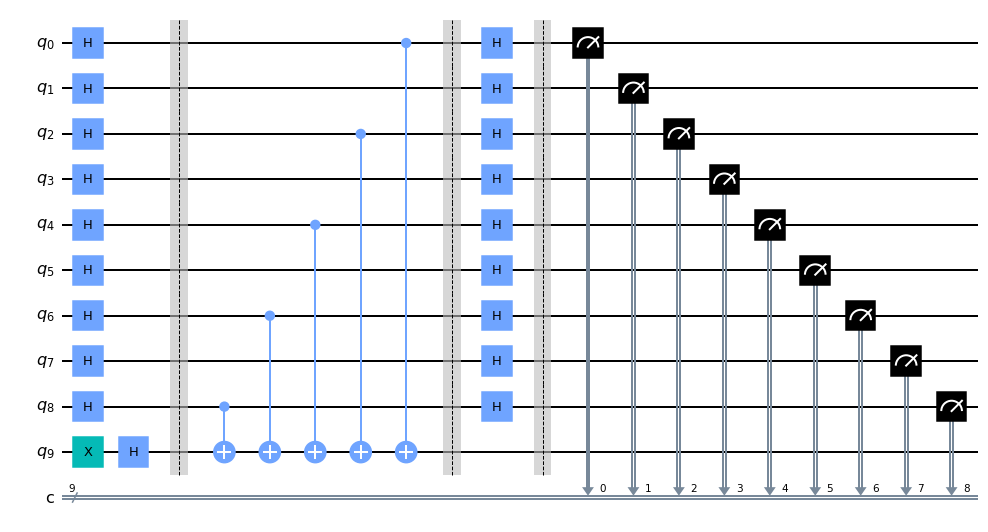

In [13]:
circuit = QuantumCircuit(9+1,9)
circuit.h([0,1,2,3,4,5,6,7,8])
circuit.x(9)
circuit.h(9)
circuit.barrier()
circuit.cx(8,9)
circuit.cx(6,9)
circuit.cx(4,9)
circuit.cx(2,9)
circuit.cx(0,9)

circuit.barrier()
circuit.h([0,1,2,3,4,5,6,7,8])
circuit.barrier()
circuit.measure([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
circuit.draw(output='mpl')

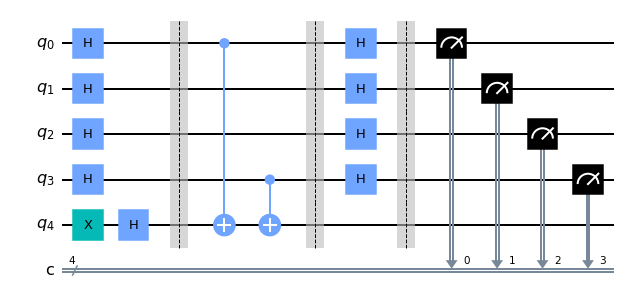

In [33]:
secretnumber = '1001'

circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno =='1':
        circuit.cx(ii,len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)),range(len(secretnumber)))
circuit.draw(output='mpl')

In [28]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots= 1).result()
counts = result.get_counts()
print(counts)

{'10001': 1}


In [34]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_bogota')#'ibmq_qasm_simulator')
job = execute(circuit, backend = qcomp)

ibmqfactory.load_account:WARNING:2021-12-12 13:59:55,094: Credentials are already in use. The existing account in the session will be replaced.


In [36]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [37]:
result = job.result()

In [39]:
counts = result.get_counts()

print (counts)

{'0000': 19, '0001': 36, '0010': 1, '0100': 3, '0101': 4, '1000': 66, '1001': 757, '1010': 5, '1011': 26, '1100': 20, '1101': 81, '1111': 6}


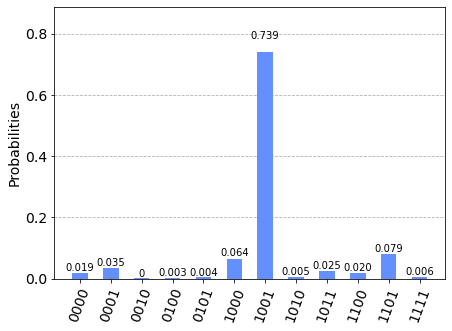

In [40]:
plot_histogram(result.get_counts(circuit))